In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [199]:
df = pd.read_csv('/workspaces/ml-zoomcamp-hw/03-Classification/WA_Fn-UseC_-Telco-Customer-Churn.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)


In [200]:
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

In [201]:
df.churn = (df.churn == 'yes').astype(int)
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [202]:
del df_train['churn']
del df_val['churn']
del df_test['churn']
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]
dv = DictVectorizer(sparse=False)



In [203]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
LogisticRegression()
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

np.float64(0.8034066713981547)

In [204]:
churn_decision

array([False, False, False, ..., False,  True,  True], shape=(1409,))

Module 4 Code 

In [205]:
len(y_val)

1409

In [206]:
(y_val == churn_decision).sum()

np.int64(1132)

In [207]:
from sklearn.metrics import accuracy_score

In [208]:
scores = []

thresholds = np.linspace(0, 1, 21)

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.513
0.10 0.608
0.15 0.661
0.20 0.703
0.25 0.734
0.30 0.758
0.35 0.765
0.40 0.782
0.45 0.791
0.50 0.803
0.55 0.801
0.60 0.796
0.65 0.789
0.70 0.766
0.75 0.742
0.80 0.729
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


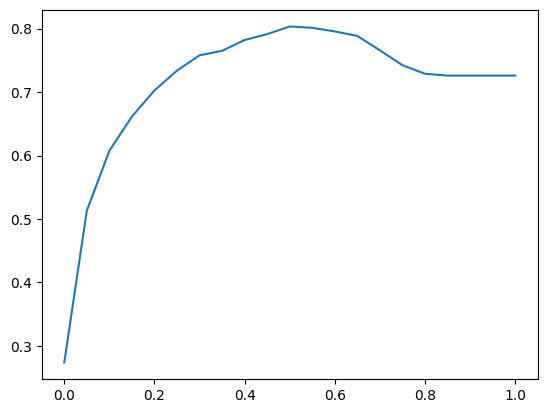

In [209]:
plt.plot(thresholds, scores)

In [210]:
from collections import Counter

In [211]:
Counter(y_pred >= 1.0)

Counter({np.False_: 1409})

In [212]:
y_val.mean()
#27% of tthe data has people churning

np.float64(0.2739531582682754)

In [213]:
1 - y_val.mean()
#73% of the data is people non churning
#This created class imbalance, more costumers non churning than churning 3:1
#Accuracy not a great score for class imbalance

np.float64(0.7260468417317246)

Confusion Table

In [214]:
actual_postive = (y_val == 1)
actual_negative = (y_val ==0)

In [215]:
actual_negative, actual_postive


(array([ True,  True,  True, ...,  True, False, False], shape=(1409,)),
 array([False, False, False, ..., False,  True,  True], shape=(1409,)))

In [216]:
t = 0.5
predict_positive = (y_pred >=t)
predict_negative = (y_pred < t)

In [217]:
predict_positive[:10],actual_postive[:10]

(array([False, False, False,  True, False, False, False, False,  True,
        False]),
 array([False, False, False,  True, False, False, False, False,  True,
         True]))

In [218]:
tp = (predict_positive & actual_postive).sum()
fp = (predict_positive & actual_negative).sum()

tn = (predict_negative & actual_negative).sum()
fn = (predict_negative & actual_postive).sum()

In [219]:
tp, tn, fp, fn

(np.int64(212), np.int64(920), np.int64(103), np.int64(174))

In [220]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])

In [221]:
confusion_matrix

array([[920, 103],
       [174, 212]])

In [222]:
(confusion_matrix/confusion_matrix.sum()).round(3)

array([[0.653, 0.073],
       [0.123, 0.15 ]])

Precision and Recall

In [223]:
#Accuracy
(tp + tn)/(tp + tn + fp +fn)


np.float64(0.8034066713981547)

In [224]:
#Precision 
#Tells us the fraction of positive predictions that are correct 
#True positives divided by true positi
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# ves + false positives
#Looking at true and  false predicted postiives
#TP/TP + FP
p = (tp/(tp+fp))
p

np.float64(0.6730158730158731)

In [225]:
tp + fp

np.int64(315)

In [226]:
#Recall
#Fraction that calculates the proportion of actual positives that were correctly identified
#Number of predicted true positives/total positive observations (true + false negatives)
#In this case looking at all the customers that are churning, all true positives.
#TP/( TP + FN)
r = (tp/(tp+fn))
r
#We only correctly identified 54% of the total of customers churning

np.float64(0.5492227979274611)

In [227]:
#False positive rate
FPR = fp/(tn + fp)

#True postive rate
TPR = tp/(tp + fn)
TPR

np.float64(0.5492227979274611)

In [228]:
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_postive = (y_val == 1)
    actual_negative = (y_val == 0)
    

    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)
    
    tp = (predict_positive & actual_postive).sum()
    tn = (predict_negative & actual_negative).sum()
    
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_postive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [229]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores[::10]

,threshold,tp,fp,fn,tn
0,0.0,386,1023,0,0
10,0.1,366,533,20,490
20,0.2,339,372,47,651
30,0.3,292,247,94,776
40,0.4,254,175,132,848
50,0.5,212,103,174,920
60,0.6,151,53,235,970
70,0.7,69,13,317,1010
80,0.8,4,0,382,1023
90,0.9,0,0,386,1023


In [230]:
df_scores['tpr']= df_scores.tp/(df_scores.tp + df_scores.fn) 
df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn) 

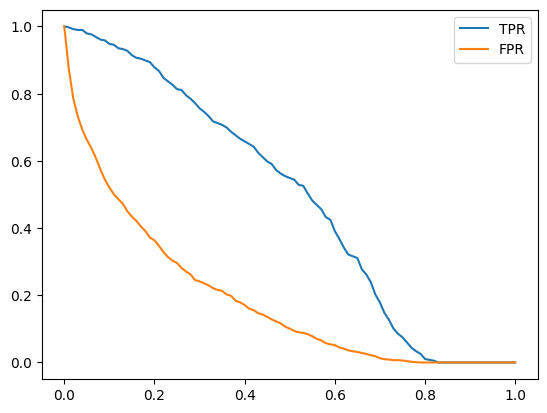

In [231]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')
plt.legend()
#We want FPR to decrease as fast possible

Random Model

In [232]:
y_rand = np.random.uniform(0, 1, size=len(y_val))
y_rand.round(3)

array([0.168, 0.473, 0.116, ..., 0.664, 0.208, 0.526], shape=(1409,))

In [233]:
((y_rand >= 0.5)== y_val).mean()

np.float64(0.5117104329311568)

In [234]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_postive = (y_val == 1)
        actual_negative = (y_val == 0)
        

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        
        tp = (predict_positive & actual_postive).sum()
        tn = (predict_negative & actual_negative).sum()
        
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_postive).sum()
        
        scores.append((t, tp, fp, fn, tn))
        
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    df_scores['tpr']= df_scores.tp/(df_scores.tp + df_scores.fn) 
    df_scores['fpr'] = df_scores.fp/(df_scores.fp + df_scores.tn) 
    
    return df_scores

In [235]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [236]:
df_rand[::10]

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.0,386,1023,0,0,1.000000,1.000000
10,0.1,349,916,37,107,0.904145,0.895406
20,0.2,313,807,73,216,0.810881,0.788856
30,0.3,281,692,105,331,0.727979,0.676442
40,0.4,248,600,138,423,0.642487,0.586510
50,0.5,206,508,180,515,0.533679,0.496579
60,0.6,167,421,219,602,0.432642,0.411535
70,0.7,119,300,267,723,0.308290,0.293255
80,0.8,73,217,313,806,0.189119,0.212121
90,0.9,36,121,350,902,0.093264,0.118280


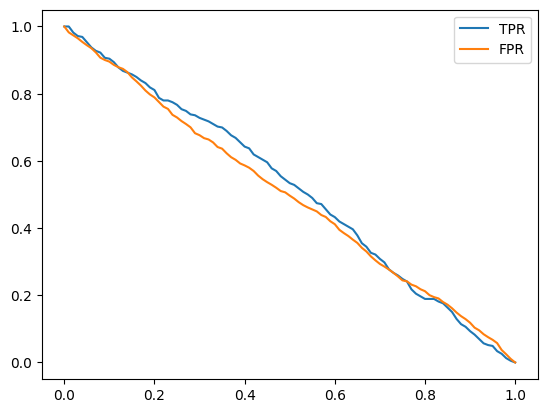

In [237]:
plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR')
plt.legend()

Ideal Model

In [238]:
num_neg = (y_val == 0).sum()
num_pos= (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [239]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1], shape=(1409,))

In [240]:
1 - y_val.mean()

np.float64(0.7260468417317246)

In [241]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

((y_ideal_pred >= 0.726) == y_ideal).mean()


np.float64(1.0)

In [242]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

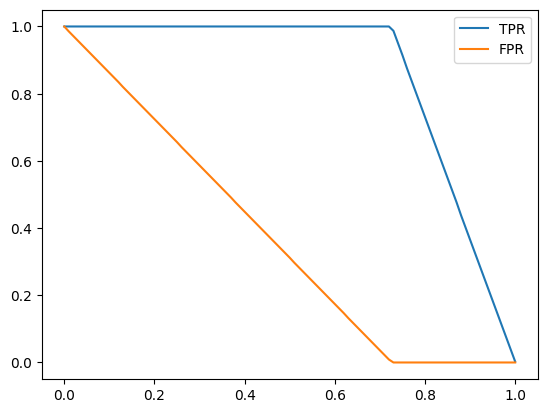

In [243]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR')
plt.legend()

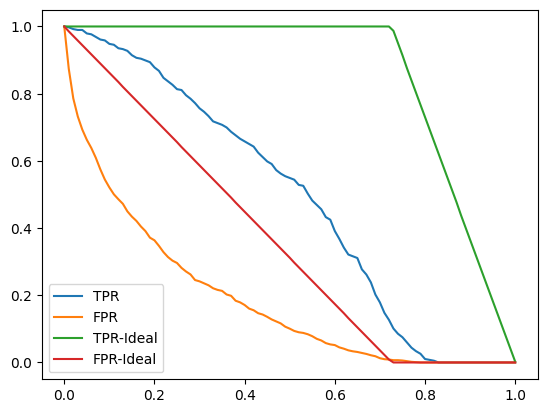

In [244]:
plt.plot(df_scores.threshold, df_scores['tpr'], label = 'TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label = 'FPR')

#plt.plot(df_rand.threshold, df_rand['tpr'], label = 'TPR-Random')
#plt.plot(df_rand.threshold, df_rand['fpr'], label = 'FPR-Random')

plt.plot(df_ideal.threshold, df_ideal['tpr'], label = 'TPR-Ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label = 'FPR-Ideal')

plt.legend()

/tmp/ipykernel_26502/161258520.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


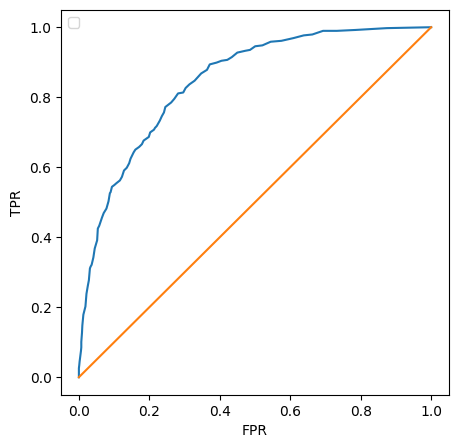

In [246]:
plt.figure(figsize=(5,5))

plt.plot(df_scores.fpr, df_scores.tpr)
plt.plot([0,1],[0,1])
#plt.plot(df_rand.fpr, df_rand.tpr)
#plt.plot(df_ideal.fpr, df_ideal.tpr)


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

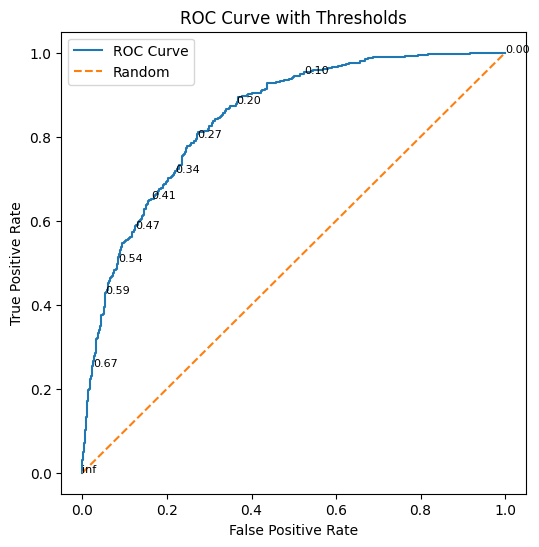

In [252]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_pred)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label = 'ROC Curve')
plt.plot([0,1],[0,1], label='Random', linestyle='--')



for i in range(0, len(thresholds), max(1, len(thresholds)//10)):  # show about 10 labels
    plt.text(fpr[i], tpr[i], f'{thresholds[i]:.2f}', fontsize=8)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Thresholds')
plt.legend()
plt.show()